# Main Imports

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict
import re
import os

# import data
file_cell_based_10x = os.path.join("..", "clean-files", "UL", "throughput", "Cell-based-10ues.txt")
file_cell_free_10x = os.path.join("..", "clean-files", "UL", "throughput", "Cell-free-10ues.txt")


## Calculations for 10X Scenarios

In [3]:
# Read content of the file
with open(file_cell_based_10x, "r") as f:
    linhas_cb = [linha.strip() for linha in f if linha.strip()]

# Regex to extract throughput values, through dictionary
dados_ues_cb = defaultdict(list)

for linha in linhas_cb:
    match = re.match(r"\[UE (\d+) \| RB \d+\] Throughput = ([\d\.]+)", linha)
    if match:
        ue = int(match.group(1))
        throughput = float(match.group(2))
        dados_ues_cb[ue].append(throughput)

# Create DataFrames for each UE 
dfs_cb = {}
for ue, valores in dados_ues_cb.items():
    tempo = [i * 10 for i in range(len(valores))] 
    df_cb = pd.DataFrame({
        "Time (ms)": tempo,
        "Throughput (Mbps)": valores
    })
    df_cb["Rolling Avg (Mbps)"] = df_cb["Throughput (Mbps)"].rolling(window=5).mean()
    dfs_cb[ue] = df_cb


# Read content of the file
with open(file_cell_free_10x, "r") as f:
    linhas_cf = [linha.strip() for linha in f if linha.strip()]

# Regex to extract throughput values, through dictionary
dados_ues_cf = defaultdict(list)

for linha in linhas_cf:
    match = re.match(r"\[UE (\d+) \| RB \d+\] Throughput = ([\d\.]+)", linha)
    if match:
        ue = int(match.group(1))
        throughput = float(match.group(2))
        dados_ues_cf[ue].append(throughput)

# Create DataFrames for each UE 
dfs_cf = {}
for ue, valores in dados_ues_cf.items():
    tempo = [i * 10 for i in range(len(valores))] 
    df_cf = pd.DataFrame({
        "Time (ms)": tempo,
        "Throughput (Mbps)": valores
    })
    df_cf["Rolling Avg (Mbps)"] = df_cf["Throughput (Mbps)"].rolling(window=5).mean()
    dfs_cf[ue] = df_cf

## Cell-Based 10x UE Throughput x Time

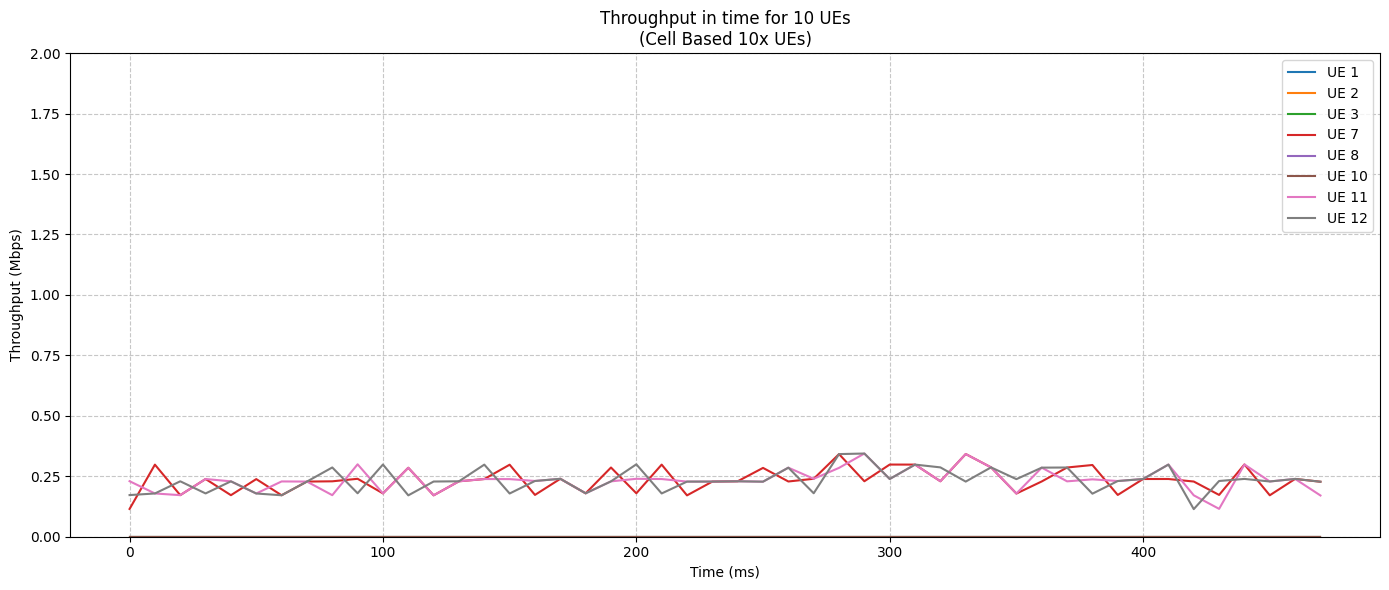

In [4]:
# Graphic of Throughput and Rolling Average
plt.figure(figsize=(14, 6))
for ue, df in dfs_cb.items():
    sns.lineplot(x="Time (ms)", y="Throughput (Mbps)", data=df, label=f"UE {ue}")
plt.title("Throughput in time for 10 UEs\n(Cell Based 10x UEs)")
plt.xlabel("Time (ms)")
plt.ylabel("Throughput (Mbps)")
plt.grid(True)
plt.legend()

plt.ylim(0, 2)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

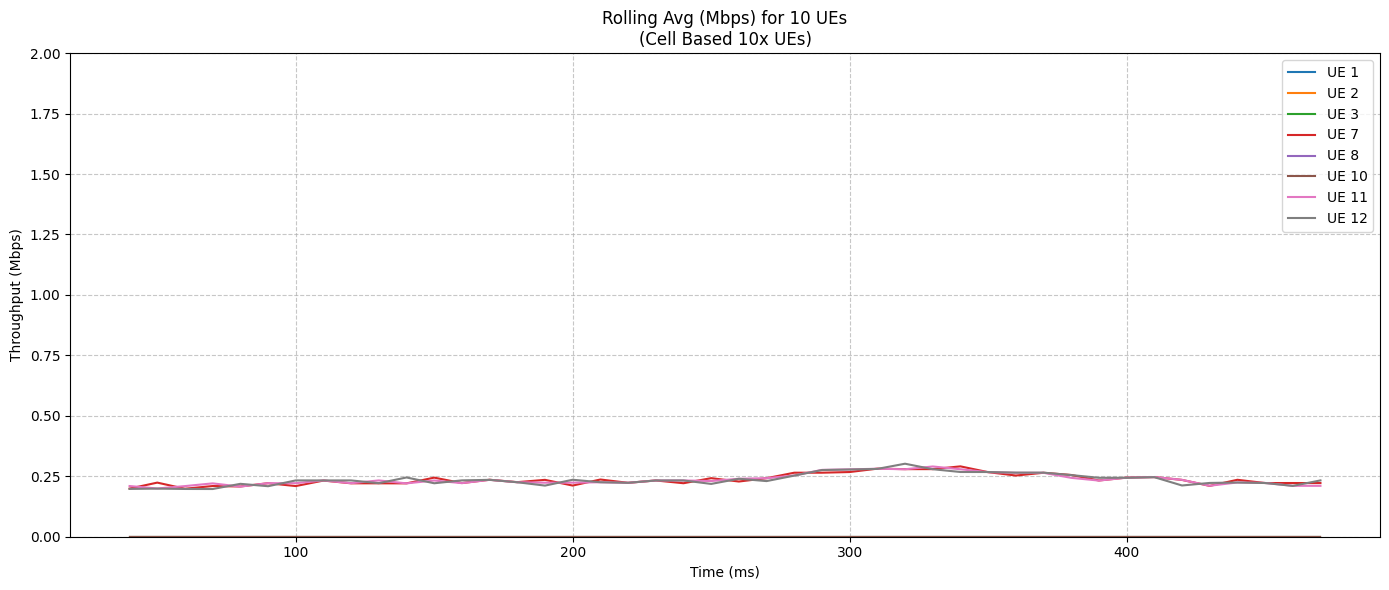

In [6]:
# Graphic of Throughput and Rolling Average
plt.figure(figsize=(14, 6))
for ue, df in dfs_cb.items():
    sns.lineplot(x="Time (ms)", y="Rolling Avg (Mbps)", data=df, label=f"UE {ue}")
plt.title("Rolling Avg (Mbps) for 10 UEs\n(Cell Based 10x UEs)")
plt.xlabel("Time (ms)")
plt.ylabel("Throughput (Mbps)")
plt.grid(True)
plt.legend()

plt.ylim(0, 2)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## Cell-Free 10x UE Throughput x Time

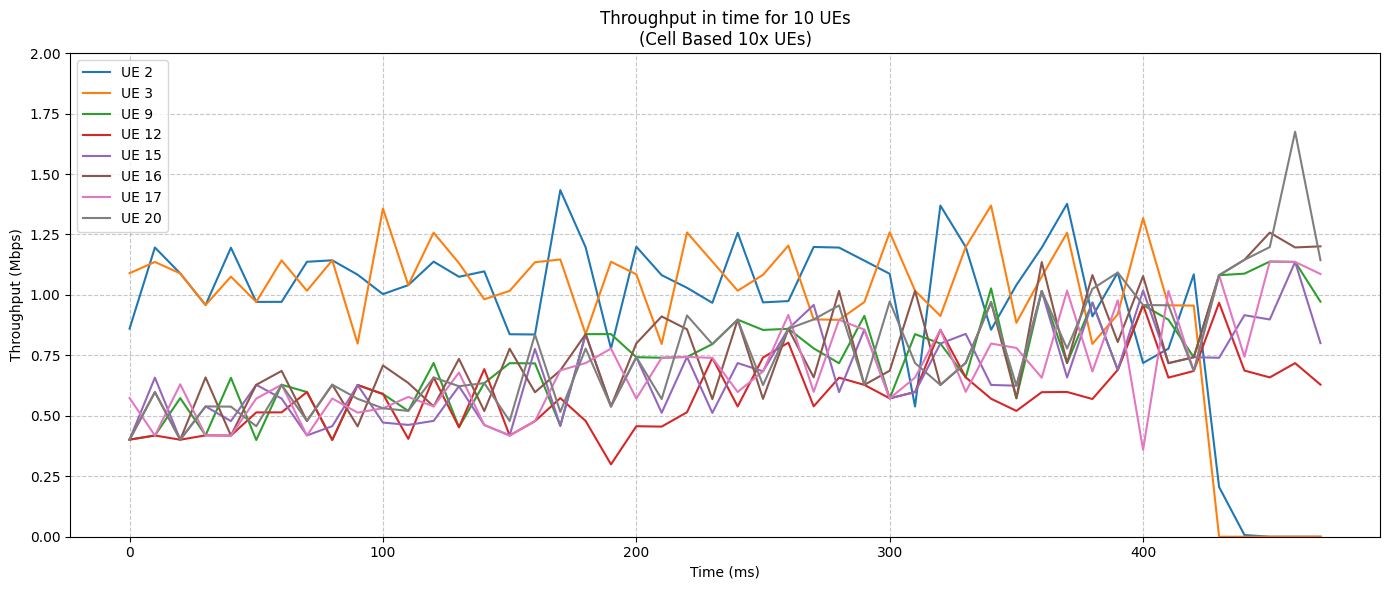

In [7]:
# Graphic of Throughput and Rolling Average
plt.figure(figsize=(14, 6))
for ue, df in dfs_cf.items():
    sns.lineplot(x="Time (ms)", y="Throughput (Mbps)", data=df, label=f"UE {ue}")
plt.title("Throughput in time for 10 UEs\n(Cell Based 10x UEs)")
plt.xlabel("Time (ms)")
plt.ylabel("Throughput (Mbps)")
plt.grid(True)
plt.legend()

plt.ylim(0, 2)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

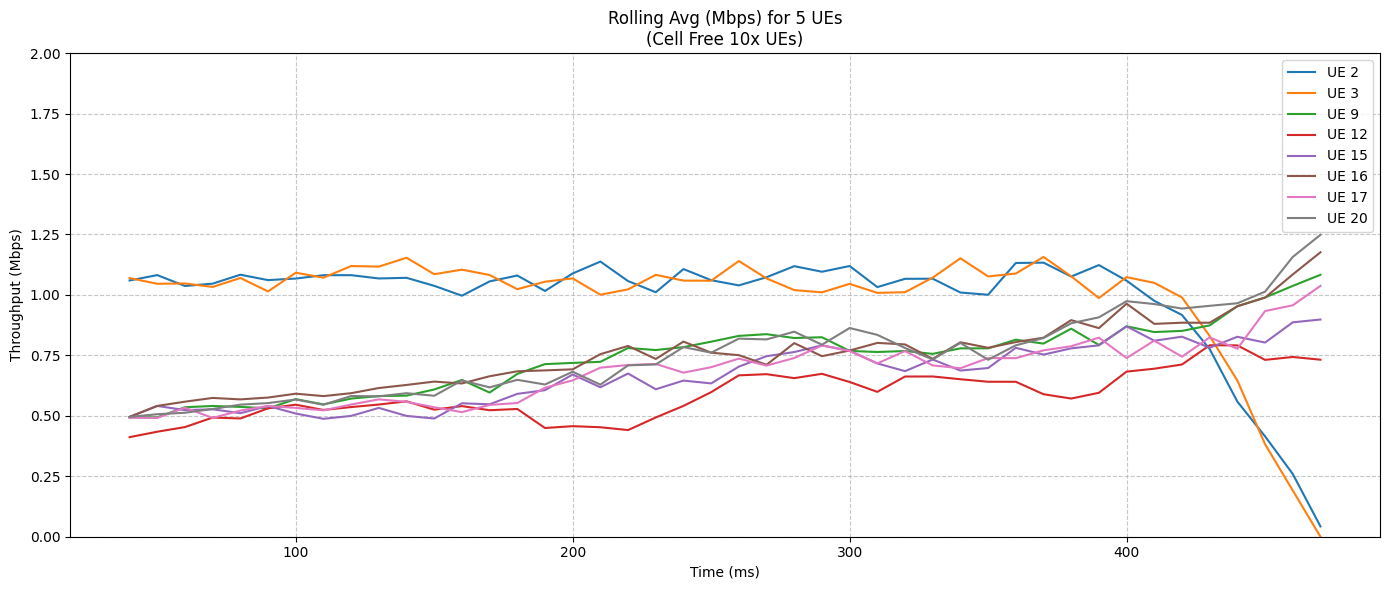

In [8]:
# Graphic of Throughput and Rolling Average
plt.figure(figsize=(14, 6))
for ue, df in dfs_cf.items():
    sns.lineplot(x="Time (ms)", y="Rolling Avg (Mbps)", data=df, label=f"UE {ue}")
plt.title("Rolling Avg (Mbps) for 5 UEs\n(Cell Free 10x UEs)")
plt.xlabel("Time (ms)")
plt.ylabel("Throughput (Mbps)")
plt.grid(True)
plt.legend()

plt.ylim(0, 2)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## Main statistics 10x Scenarios

### Cell-Based

In [10]:
print(df_cb["Throughput (Mbps)"].describe())

count    48.000000
mean      0.233979
std       0.049425
min       0.114120
25%       0.179720
50%       0.229230
75%       0.285598
max       0.344100
Name: Throughput (Mbps), dtype: float64


### Cell-Free

In [11]:
print(df_cf["Throughput (Mbps)"].describe())

count    48.000000
mean      0.763268
std       0.254413
min       0.401160
25%       0.570125
50%       0.701735
75%       0.956805
max       1.674890
Name: Throughput (Mbps), dtype: float64
